In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Please manually download bank-additional-full.csv from below link and copy it to the directory of your jupyter notebook:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

# Reading the input file "bank-additional-full"
input_data=pd.read_csv('bank-additional-full.csv')

In [3]:
# See how data looks like
input_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Checking the type of features and whether they contain any null values
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Defining att_val_count function to print the values/counts of input features:
def att_val_count(att_list):
    for i in att_list:
        print("\n"+i)
        print(input_data[i].value_counts())

In [6]:
# calling att_val_count function to check the values of all columns
att_val_count(input_data.columns)


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

housing
yes        21576
no         18622
unknown      990
Nam

In [7]:
# Converting "contact", "month", "day_of_week" from categorical to numerical using lable encoding
input_data['contact'] = input_data['contact'].map({'telephone':0, 'cellular':1})
input_data['month'] = input_data['month'].map({'mar':0, 'apr':1,'may':2,'jun':3,'jul':4,'aug':5,'sep':6,'oct':7,'nov':8,'dec':9})
input_data['day_of_week'] = input_data['day_of_week'].map({'mon':0, 'tue':1, 'wed':2,'thu':3,'fri':4})

In [8]:
# cheking the new values for "contact", "month", "day_of_week" after lable encoding
att_val_count({"contact","month","day_of_week"})


day_of_week
3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

contact
1    26144
0    15044
Name: contact, dtype: int64

month
2    13769
4     7174
5     6178
3     5318
8     4101
1     2632
7      718
6      570
0      546
9      182
Name: month, dtype: int64


In [9]:
# converting the rest of categorical attributes (such as jub and marital for which order has no meaning) to dummy variables
input_data = pd.get_dummies(data=input_data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome'])

In [10]:
# calling function att_val_count again to make sure all attributes are numeric now
att_val_count(input_data.columns)


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

contact
1    26144
0    15044
Name: contact, dtype: int64

month
2    13769
4     7174
5     6178
3     5318
8     4101
1     2632
7      718
6      570
0      546
9      182
Name: month, dtype: int64

day_of_week
3    8623
0    8514
2    8134
1    8090
4    7827
Name: day_of_week, dtype: int64

duration
85      170
90      170
136     168
73      167
124     164
       ... 
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        

In [11]:
# Defining plot_conf_matrix function to plot the confusion matrix of a model on test set
from sklearn.metrics import plot_confusion_matrix
def plot_conf_matrix(model):
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',)
    disp.ax_.set_title('Confusion Matrix')

In [12]:
# Plotting the correlation matrix between features
f = plt.figure(figsize=(19, 15))
corr = input_data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
age,1.000000,-0.007021,0.077265,-0.018486,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.102584,-0.024191,0.031213,0.085403,0.062040,0.440772,-0.001356,-0.065731,-0.199749,-0.064383,-0.004426,0.047773,0.166125,0.271266,-0.411703,0.001062,0.244079,0.009897,-0.038320,-0.106550,0.017007,0.002054,-0.071138,0.069485,-0.165019,0.165001,0.001891,0.001755,-0.001092,-0.001414,0.007224,-0.001092,-0.007198,-0.002537,-0.016376,0.035626
contact,-0.007021,1.000000,0.324315,-0.019583,0.026657,-0.077368,-0.117970,0.212848,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.059227,-0.094712,-0.018894,-0.010455,0.009031,0.035096,-0.002480,-0.035596,0.040422,0.048635,-0.007691,-0.023454,-0.003111,-0.063648,0.071159,0.002543,-0.050234,-0.045717,-0.054866,-0.013354,0.008624,0.022695,0.103159,-0.020543,0.135451,-0.135604,0.006474,-0.077937,-0.022189,0.084472,-0.003669,-0.022189,0.013367,0.207659,-0.242512,0.111934
month,0.077265,0.324315,1.000000,-0.006959,-0.019302,-0.030635,-0.079556,0.063754,0.058874,-0.150350,0.264227,0.163411,0.132697,0.048007,-0.137050,0.017709,0.015749,0.052320,0.042128,0.017154,-0.061668,-0.000735,0.053849,0.030829,-0.009288,0.009672,0.010255,-0.017394,-0.005574,-0.033916,-0.054866,-0.076971,-0.036751,0.006863,0.032650,0.125366,-0.013355,0.084580,-0.084801,0.010003,-0.029715,-0.011869,0.033252,0.006375,-0.011869,-0.001696,0.007359,-0.043635,0.070997
day_of_week,-0.018486,-0.019583,-0.006959,1.000000,0.010549,0.015098,0.006765,0.004013,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.005294,0.007334,-0.001329,-0.011988,-0.010201,-0.004719,0.004525,-0.003029,0.001535,0.001473,0.006405,-0.015100,-0.012428,-0.001971,0.010839,0.000247,-0.008989,0.005162,0.006534,-0.007824,0.006063,0.000622,-0.000021,0.010917,0.004164,-0.004040,-0.005923,0.008510,0.002607,-0.009280,-0.002793,0.002607,0.001850,0.011805,-0.007406,-0.005842
duration,-0.000866,0.026657,-0.019302,0.010549,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.008918,0.012992,0.003679,-0.004908,-0.001308,0.012421,0.004270,0.000142,0.014432,-0.013742,-0.005413,-0.006450,-0.006156,-0.004042,0.007808,0.009263,0.008476,0.005739,0.004810,0.005500,0.001491,-0.008472,-0.012641,0.003317,0.011694,-0.011588,-0.005101,0.008334,-0.004897,-0.006804,0.001856,-0.004897,0.000121,-0.013311,-0.011665,0.044876
campaign,0.004594,-0.077368,-0.030635,0.015098,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.011745,-0.001775,-0.002203,0.004226,-0.009135,-0.006847,0.006361,0.002383,-0.024657,0.001557,-0.000200,0.002625,0.005872,0.002332,-0.007624,0.009873,0.004000,-0.000991,-0.005278,0.000195,-0.002188,0.002554,-0.000950,0.002162,-0.032923,0.033007,-0.003803,0.010959,-0.000396,-0.010800,-0.004831,-0.000396,0.005294,-0.068890,0.087645,-0.050893
pdays,-0.034369,-0.117970,-0.079556,0.006765,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.025398,0.065335,0.019246,-0.001649,0.000254,-0.072084,0.014307,0.030573,-0.096367,0.004575,-0.023085,-0.011419,0.011711,0.031614,-0.042015,-0.005989,0.005804,0.023238,0.036963,0.005522,-0.002086,-0.003493,-0.036958,-0.022014,-0.080072,0.080047,0.001668,0.010131,0.002033,-0.010719,-0.000737,0.002033,-0.000086,0.006354,0.491

<Figure size 1368x1080 with 0 Axes>

In [13]:
col_corr = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if (corr.iloc[i, j] >= 0.98) and (corr.columns[j] not in col_corr):
            colname = corr.columns[i] # getting the name of column
            col_corr.add(colname)
            if colname in input_data.columns:
                input_data.drop(colname, axis=1, inplace = True)
input_data.head()

,age,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,2,0,261,1,999,0,1.1,93.994,...,0,0,1,0,0,1,0,0,1,0
1,57,0,2,0,149,1,999,0,1.1,93.994,...,1,0,1,0,0,1,0,0,1,0
2,37,0,2,0,226,1,999,0,1.1,93.994,...,0,0,0,0,1,1,0,0,1,0
3,40,0,2,0,151,1,999,0,1.1,93.994,...,0,0,1,0,0,1,0,0,1,0
4,56,0,2,0,307,1,999,0,1.1,93.994,...,0,0,1,0,0,0,1,0,1,0


"loan_unknown" is removed as they are highly correlated with "housing unknown" respectively

                                    Decision Tree Classification

In [14]:
#importing libraries for decision tree classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


# removing "y", as a target variable, from data and move it to variable "label"
training_set = input_data.drop('y',axis=1)
label = input_data.y

# Splitting the data to training and test data, 67% and 33% respectively 
X_train, X_test, y_train, y_test = train_test_split(training_set, label, test_size = 0.33, random_state = 20)

# Creating decision trees with different depths (from 2 to 20) and see their accuracy on training and test set
dtree_model = [0]*20
dtree_accuracy_train = [0]*20
dtree_accuracy_test = [0]*20
dtree_pred_train = [0]*20
dtree_pred_test = [0]*20

for i in range(2,20):
    dtree = DecisionTreeClassifier(random_state=30 , max_depth=i)
    dtree_model[i] = dtree.fit(X_train, y_train)
    dtree_pred_train[i] = dtree_model[i].predict(X_train)
    dtree_pred_test[i] = dtree_model[i].predict(X_test)
    dtree_accuracy_train[i] = accuracy_score(y_train, dtree_pred_train[i])
    dtree_accuracy_test[i] = accuracy_score(y_test, dtree_pred_test[i])
    

# Sorting the Decision Trees with different depth based on the Accuracy Score
models = pd.DataFrame({
                    'Decision Tree Depth': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
                    'Test Accuracy': dtree_accuracy_test[2:20],
                    'Training Accuracy' : dtree_accuracy_train[2:20]
})

models.sort_values(by='Test Accuracy', ascending=False)

,Decision Tree Depth,Test Accuracy,Training Accuracy
4,6,0.917163,0.919478
3,5,0.916354,0.916398
5,7,0.916060,0.922558
2,4,0.915324,0.911868
6,8,0.911940,0.926798
8,10,0.910101,0.939917
7,9,0.909880,0.933829
1,3,0.909292,0.907556
9,11,0.905172,0.947273
10,12,0.903406,0.954629


In [15]:
# Checking the best depth for decision tree in terms of Test Accuracy and printing out its training and test accuracy
best_acc = max(dtree_accuracy_test)
best_depth = dtree_accuracy_test.index(best_acc)
pd.DataFrame({
                'Classifier': ['Decision Tree'],
                'The Best Depth': best_depth,
                'Test Accuracy': best_acc,
                'Training Accuracy': dtree_accuracy_train[best_depth]
})

,Classifier,The Best Depth,Test Accuracy,Training Accuracy
0,Decision Tree,6,0.917163,0.919478


                                   Deciosion Tree (with best depth) Visualization

The visualization of Decision Tree Classifier with depth 6 (best depth)
Double Click on the tree to make it more visible


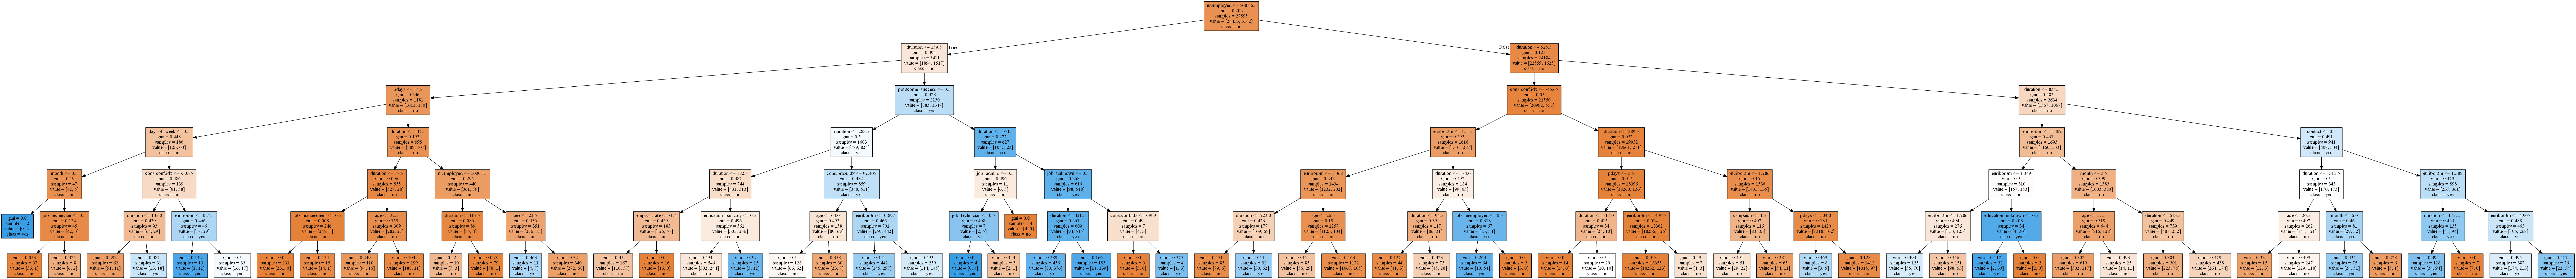

In [16]:
import pydotplus
from sklearn import tree
from IPython.display import Image 

ln = ['no', 'yes']

# Create DOT data
dot_data = tree.export_graphviz(dtree_model[best_depth], out_file=None, 
                                feature_names=training_set.columns,  
                                class_names=ln,
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
print("The visualization of Decision Tree Classifier with depth {0} (best depth)".format(best_depth))
print("Double Click on the tree to make it more visible")
Image(graph.create_png())


Confusion Matrix for Decision Tree Classifier (depth 6)


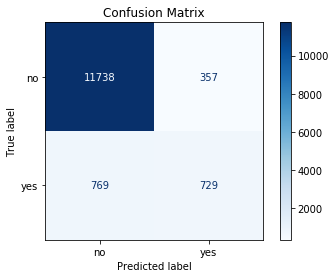

In [17]:
# Calculating the confusion matrix of best decision tree (best depth) on test set 
print("\nConfusion Matrix for Decision Tree Classifier (depth {0})".format(best_depth))
plot_conf_matrix(dtree_model[best_depth])

                                           Naive Bayes Classification

In [18]:
from sklearn.naive_bayes import GaussianNB

gaussian_NB = GaussianNB()
gaussian_NB_model = gaussian_NB.fit(X_train, y_train)
gaussian_NB_pred_train = gaussian_NB_model.predict(X_train)
gaussian_NB_pred_test = gaussian_NB_model.predict(X_test)
gaussian_NB_accuracy_train = accuracy_score(y_train, gaussian_NB_pred_train)
gaussian_NB_accuracy_test = accuracy_score(y_test, gaussian_NB_pred_test)

# Printing out the training and test accuracy for Naive Bayes classifier
pd.DataFrame({
                'Classifier': ['Naive Bayes'],
                'Test Accuracy': gaussian_NB_accuracy_test,
                'Training Accuracy': gaussian_NB_accuracy_train
})

,Classifier,Test Accuracy,Training Accuracy
0,Naive Bayes,0.845362,0.839536



Confusion Matrix for Naive Bayes Classifier


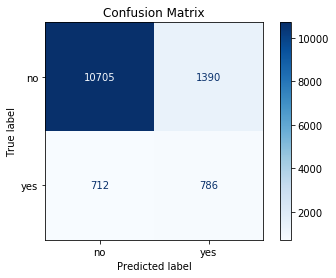

In [19]:
# Calculating the confusion matrix of Naive Bayes classifier on test set 
print("\nConfusion Matrix for Naive Bayes Classifier")
plot_conf_matrix(gaussian_NB_model)

                                         Support Vector Machine Classification

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)
svm_model = svm.fit(X_train,y_train)
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)
svm_accuracy_train = accuracy_score(y_train,svm_pred_train)
svm_accuracy_test = accuracy_score(y_test,svm_pred_test)

# Printing out the training and test accuracy for SVM classifier
pd.DataFrame({
                'Classifier': ['Support Vector Machine'],
                'Test Accuracy': svm_accuracy_test,
                'Training Accuracy': svm_accuracy_train,
})

,Classifier,Test Accuracy,Training Accuracy
0,Support Vector Machine,0.899949,0.89759



Confusion Matrix for Support Vector Machine Classifier


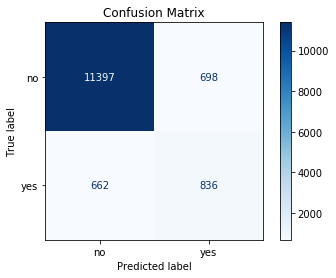

In [21]:
# Calculating the confusion matrix of Support Vector Machine classifier on test set 
print("\nConfusion Matrix for Support Vector Machine Classifier")
plot_conf_matrix(svm_model)

                                             K-nearest Neighbor Classification

In [16]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = [0]*11
knn_accuracy_train = [0]*11
knn_accuracy_test = [0]*11
knn_pred_train = [0]*11
knn_pred_test = [0]*11

for i in range(2,11,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_model[i] = knn.fit(X_train,y_train)
    knn_pred_train[i] = knn_model[i].predict(X_train)
    knn_pred_test[i] = knn_model[i].predict(X_test)
    knn_accuracy_train[i] = accuracy_score(y_train,knn_pred_train[i])
    knn_accuracy_test[i] = accuracy_score(y_test,knn_pred_test[i])
    

# Sorting the k-nearset neighbor classifiers with different k based on the Accuracy Score on test set
models = pd.DataFrame({
                    'number of neighbors': ['2', '4', '6', '8', '10'],
                    'Test Accuracy' : knn_accuracy_test[2:11:2],
                    'Training Accuracy': knn_accuracy_train[2:11:2]
})

models.sort_values(by='Test Accuracy', ascending=False)

,number of neighbors,Test Accuracy,Training Accuracy
2,6,0.907894,0.925494
3,8,0.907894,0.924733
4,10,0.907526,0.922124
1,4,0.903406,0.931980
0,2,0.897741,0.942852


In [17]:
# Checking the best depth for decision tree in terms of Test Accuracy and printing out its training and test accuracy
best_acc = max(knn_accuracy_test)
best_k = knn_accuracy_test.index(best_acc)
pd.DataFrame({
                'Classifier': ['K-nearest Neighbor'],
                'The Best K': best_k,
                'Test Accuracy': best_acc,
                'Training Accuracy': knn_accuracy_train[best_k]
})

,Classifier,The Best K,Test Accuracy,Training Accuracy
0,K-nearest Neighbor,6,0.907894,0.925494



Confusion Matrix for K-nearest Neighbor Classifier (number of naighbors 6)


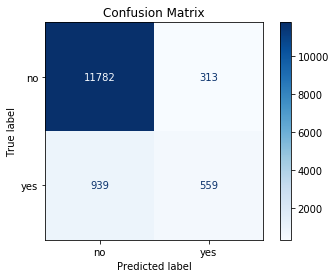

In [18]:
# Calculating the confusion matrix of K-nearest Neighbor classifier on test set 
print("\nConfusion Matrix for K-nearest Neighbor Classifier (number of naighbors {0})".format(best_k))
plot_conf_matrix(knn_model[best_k])

                                    Plotting the ROC Curves for 4 classifiers

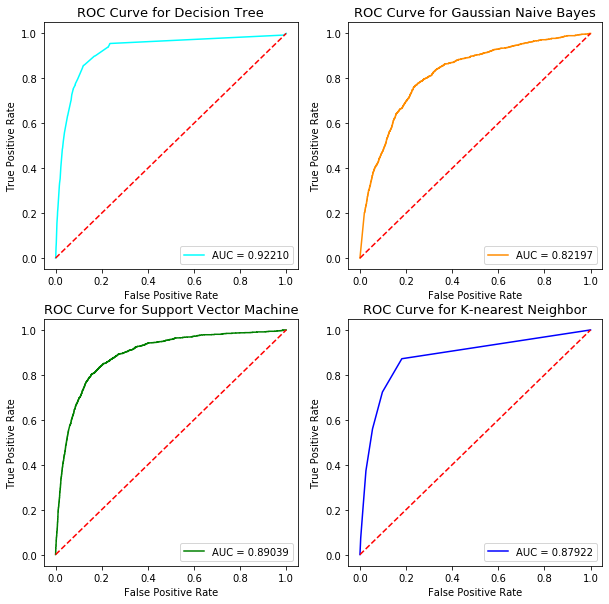

In [25]:
from sklearn import metrics
# Creating 4 subplots for plotting 2 ROC curves correspond to the 4 classifiers
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

# Calculating tpr, fpr and AUC for Decision Tree Classifier with the best depth (6)
dtree_prob = dtree_model[best_depth].predict_proba(X_test)
dtree_preds = dtree_prob[:,1]
fpr_dtree, tpr_dtree, _ = metrics.roc_curve(y_test, dtree_preds, pos_label='yes')
auc_dtree = metrics.auc(fpr_dtree, tpr_dtree)

# Calculating the tpr, fpr and AUC for Naive Bayes Classifier
gaussian_NB_prob = gaussian_NB_model.predict_proba(X_test)
gaussian_NB_preds = gaussian_NB_prob[:,1]
fpr_gaussian_NB, tpr_gaussian_NB, _ = metrics.roc_curve(y_test, gaussian_NB_preds, pos_label='yes')
auc_gaussian_NB = metrics.auc(fpr_gaussian_NB, tpr_gaussian_NB)

# Calculating the tpr, fpr and AUC for Support Vector Machine Classifier
svm_prob = svm_model.predict_proba(X_test)
svm_preds = svm_prob[:,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_preds, pos_label='yes')
auc_svm = metrics.auc(fpr_svm, tpr_svm)

# Calculating the tpr, fpr and AUC for K-nearest Neighbor Classifier
knn_prob = knn_model[best_k].predict_proba(X_test)
knn_preds = knn_prob[:,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, knn_preds, pos_label='yes')
auc_knn = metrics.auc(fpr_knn, tpr_knn)

# Plotting ROC Curve (tpr versus fpr) for the Decision Tree Classifier 
ax_arr[0,0].plot(fpr_dtree, tpr_dtree, label = 'AUC = %0.5f' % auc_dtree, color='aqua')
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Curve for Decision Tree',fontsize=13)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

# Plotting ROC Curve (tpr versus fpr) for the Naive Bayes Tree Classifier 
ax_arr[0,1].plot(fpr_gaussian_NB, tpr_gaussian_NB, label = 'AUC = %0.5f' % auc_gaussian_NB, color='darkorange')
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Curve for Gaussian Naive Bayes',fontsize=13)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

# Plotting ROC Curve (tpr versus fpr) forSupport the Vector Machine Classifier 
ax_arr[1,0].plot(fpr_svm, tpr_svm, label = 'AUC = %0.5f' % auc_svm, color='green')
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Curve for Support Vector Machine',fontsize=13)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

# Plotting ROC Curve (tpr versus fpr) for the K-nearest Neighbor Classifier 
ax_arr[1,1].plot(fpr_knn, tpr_knn, label = 'AUC = %0.5f' % auc_knn, color='blue')
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC Curve for K-nearest Neighbor',fontsize=13)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

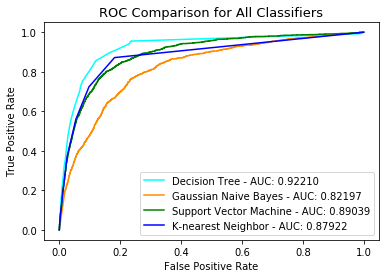

In [26]:
# Comparing ROC Curve for all the 4 Classifiers in one figure
plt.figure()
plt.plot(fpr_dtree, tpr_dtree, 'b', label = 'Decision Tree - AUC: %0.5f' % auc_dtree, color='aqua')
plt.plot(fpr_gaussian_NB, tpr_gaussian_NB, 'b', label = 'Gaussian Naive Bayes - AUC: %0.5f' % auc_gaussian_NB, color='darkorange')
plt.plot(fpr_svm, tpr_svm, 'b', label = 'Support Vector Machine - AUC: %0.5f' % auc_svm, color='green')
plt.plot(fpr_knn, tpr_knn, 'b', label = 'K-nearest Neighbor - AUC: %0.5f' % auc_knn, color='blue')
plt.title('ROC Comparison for All Classifiers',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=10)
plt.xlabel('False Positive Rate',fontsize=10)
plt.legend(loc = 'lower right', prop={'size': 10})

In [27]:
# Sorting the classifiers based on their Accuracy on Test set
models = pd.DataFrame({
                    'Model': ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN'],
                    'Test Accuracy' : [dtree_accuracy_test[best_depth],gaussian_NB_accuracy_test,svm_accuracy_test,knn_accuracy_test[best_k]],
})

models.sort_values(by='Test Accuracy', ascending=False)

,Model,Test Accuracy
0,Decision Tree,0.917163
3,KNN,0.907894
2,SVM,0.899949
1,Naive Bayes,0.845362


In [28]:
# Sorting the classifiers based on AUC
models = pd.DataFrame({
                    'Model': ['Decision Tree', 'Naive Bayes', 'SVM', 'KNN'],
                    'AUC' : [auc_dtree,auc_gaussian_NB,auc_svm,auc_knn],
})

models.sort_values(by='AUC', ascending=False)

,Model,AUC
0,Decision Tree,0.922100
2,SVM,0.890385
3,KNN,0.879225
1,Naive Bayes,0.821965


In [ ]:
# Checking the importance of features to predict the target so that we can select the 2 most important for visualization
from sklearn.inspection import permutation_importance
r = permutation_importance(gaussian_NB_model, X_train, y_train,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{input_data.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

pdays   0.027 +/- 0.001
poutcome_nonexistent0.025 +/- 0.001
duration0.014 +/- 0.001
job_services0.007 +/- 0.000
job_management0.002 +/- 0.000
education_basic.6y0.002 +/- 0.000
education_basic.4y0.001 +/- 0.000
job_self-employed0.001 +/- 0.000
education_basic.9y0.000 +/- 0.000


In [19]:
# Defining the function for plotting the Decision Boundaries of a model
def plot_decision_boundaries(X, y, model):
    
    reduced_data = pd.DataFrame()

    # Training classifiers
    # model = DecisionTreeClassifier(random_state=30 , max_depth=best_depth)
    
    #X_test = X_test.iloc[0:1000,:]
    #y_test = y_test.iloc[0:1000]
    #y_test = y_test.map({'yes':1, 'no':0})
    
    #reduced_data[['pdays', 'duration']] = X_test[['pdays', 'duration']]
    
    model.fit(X, y)
    
    
    h = .2     # point in the mesh [x_min, m_max]x[y_min, y_max].    
    
    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[0:200, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[0:200, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, alpha=0.8)
    return plt

In [20]:
# Reducing the dimension of features to the two most important ones based on the output of function permutation_importance
X = pd.DataFrame()
X[['pdays', 'duration']] = X_test[['pdays', 'duration']]
y = y_test.map({'yes':1, 'no':0})

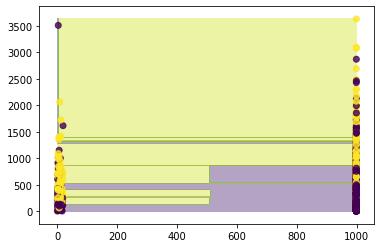

In [36]:
print("The decision Boundry for Decision Tree")
plot_decision_boundaries(X,y,DecisionTreeClassifier(random_state=30 , max_depth=best_depth)).show()

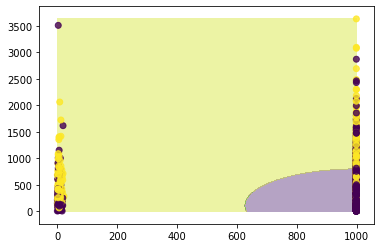

In [37]:
print("The decision Boundry for Naive Bayes")
plot_decision_boundaries(X,y,GaussianNB()).show()

In [ ]:
print("The decision Boundry for KNN")
plot_decision_boundaries(X,y,KNeighborsClassifier(n_neighbors=best_k)).show()

The decision Boundry for KNN


In [ ]:
print("The decision Boundry for SVM")
plot_decision_boundaries(X,y,SVC(kernel='linear', probability=True)).show()